In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import LearningCurveDisplay
from sklearn.base import clone

## Monk 1

In [121]:
path=r'/home/ludovico/ML-project/data/monks-3'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [157]:
estimator_MLP = MLPClassifier()


parameters_MLP= {
'learning_rate': [ "adaptive"],
'hidden_layer_sizes': [(3,), (4,)],
'alpha': [0.0001,0.001],
'activation': ['relu','tanh'],
'learning_rate_init': [0.01,0.1],
'max_iter': [1500],
'batch_size':['auto'],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [10],
'momentum': [0.1,0.5,0.7],
'nesterovs_momentum': [True],
'tol': [1e-4],
'random_state':[42]
}


# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_MLP,
    param_grid=parameters_MLP,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
)

MLP=grid_search.fit(x_train, y_train)

/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10

In [158]:
cv_results_df = pd.DataFrame(MLP.cv_results_)
best_model_index=MLP.best_index_

print('best params',MLP.best_params_) 

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

cv_results_df[['mean_test_score','mean_train_score','param_learning_rate','param_hidden_layer_sizes','param_activation']]

best params {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 1500, 'momentum': 0.1, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'random_state': 42, 'solver': 'sgd', 'tol': 0.0001}
Train accuracy: 0.9344119503471492 +/- 0.013951674640474077
validation accuracy: 0.9325999999999999 +/- 0.05585115138572446


,mean_test_score,mean_train_score,param_learning_rate,param_hidden_layer_sizes,param_activation
0,0.932600,0.934412,adaptive,"(3,)",relu
1,0.927667,0.937286,adaptive,"(3,)",relu
2,0.921133,0.941380,adaptive,"(3,)",relu
3,0.898200,0.960248,adaptive,"(3,)",relu
4,0.891467,0.974580,adaptive,"(3,)",relu
5,0.891533,0.979882,adaptive,"(3,)",relu
6,0.863733,0.927423,adaptive,"(4,)",relu
7,0.916000,0.936457,adaptive,"(4,)",relu
8,0.914400,0.941384,adaptive,"(4,)",relu
9,0.909533,0.961881,adaptive,"(4,)",relu


## Learning curve

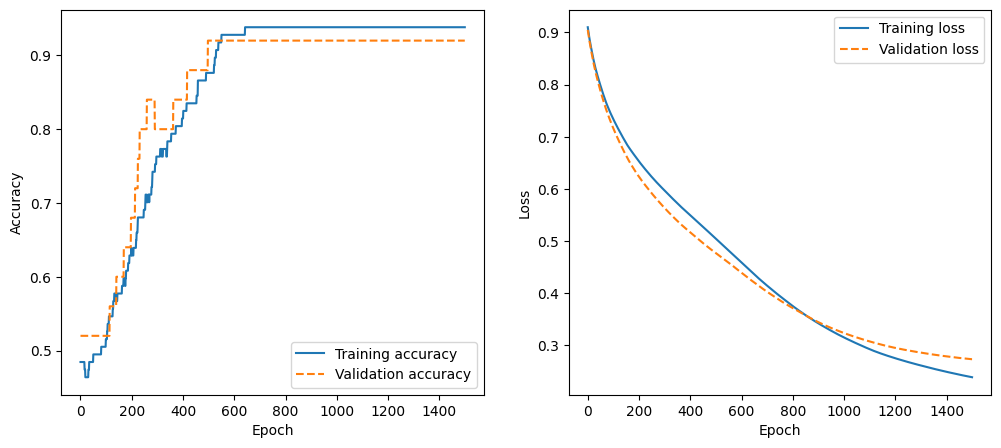

In [160]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train_cl, x_val, y_train_cl, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train, shuffle=True)

best_params=grid_search.best_params_
best_params['early_stopping']=False

# Initialize the classifier
clf=clone(MLPClassifier(**best_params))

# Lists to store training and validation loss
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Training loop
for epoch in range(1500):
    # Partial fit on the training set
    clf.partial_fit(x_train_cl, y_train_cl, classes=np.unique(y_train_cl))

    # Calculate training loss
    y_train_pred = clf.predict(x_train_cl)
    train_acc.append(metrics.accuracy_score(y_train_cl, y_train_pred))
    y_train_pred = clf.predict_proba(x_train_cl)
    train_loss.append(metrics.log_loss(y_train_cl.astype(np.float32), y_train_pred.astype(np.float32)))

    # Calculate validation loss
    y_val_pred = clf.predict(x_val)
    val_acc.append(metrics.accuracy_score(y_val, y_val_pred))
    y_val_pred = clf.predict_proba(x_val)
    val_loss.append(metrics.log_loss(y_val.astype(np.float32), y_val_pred.astype(np.float32)))

# Plot the loss curves
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, linestyle='--' ,label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, linestyle='--' ,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred =MLP.predict(x_test)

print('Accuracy Score - KNN - Test-error:', metrics.accuracy_score(y_test, y_pred))  

print('\n Classification report',metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=MLP.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=MLP.classes_)
disp.plot()
plt.show()